In [1]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [3]:
import os

In [4]:
mjd_peak = 2458986.91
mjd_exp = 2459009.96090

In [5]:
Sci_folder = 'gemini_gnirs_pypeit/Science/'
ls = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i and 'GNIRS' in i)
]
ls_cal = [
    i for i in os.listdir(Sci_folder)
    if ('HIP' in i and 'fits' in i and 'spec1d' in i)
]

## Standard stars

In [6]:
f = fits.open(Sci_folder+ls_cal[0])
f.info()
print(repr(f[0].header))
f.close()

Filename: gemini_gnirs_pypeit/Science/spec1d_N20200609S0043-HIP95793_GNIRS_20200609T114012.285.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  OBJ0772-DET01-ORDER0008    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  OBJ0772-DET01-ORDER0007    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  OBJ0772-DET01-ORDER0006    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  OBJ0772-DET01-ORDER0005    1 BinTableHDU     85   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  5  OBJ0772-DET01-ORDER0004    1 BinTableHDU     85   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1

In [7]:
output = 'HIP95793_GNIRS_coadd.fits'
#os.system('cp {} {}'.format(Sci_folder + ls_cal[0], Sci_folder + output))

[8238.27024887 8240.38725053] [9446.93186641 9449.30003661]
[8238.25564251 8240.39208842] [9446.95419418 9449.32167752]
[8230.89841952 8233.13117145] [9442.31448212 9444.60836528]
[8230.44840356 8232.68356299] [9442.26503335 9444.53733334]
[8773.24812099 8775.87163538] [10787.72935681 10790.41110714]
[8773.24204726 8775.86341209] [10787.73946751 10790.42136498]
[8773.58536547 8776.19268069] [10788.51511696 10791.21073803]
[8773.57081447 8776.17646102] [10788.52512098 10791.22185875]
[9323.40571452 9326.55601404] [12584.65418119 12587.8349872 ]
[9323.41024969 9326.56367552] [12584.66300021 12587.84698522]
[9323.26319813 9326.42118981] [12585.42575127 12588.58401267]
[9323.27324572 9326.42580865] [12585.43041118 12588.58851138]
[11177.40640728 11181.241077  ] [15101.41046337 15105.26783133]
[11177.42134583 11181.25743953] [15101.38106148 15105.24199678]
[11178.11514697 11181.9127757 ] [15103.38572297 15107.26857335]
[11178.12882398 11181.92556818] [15103.39127507 15107.27387854]
[13962.7

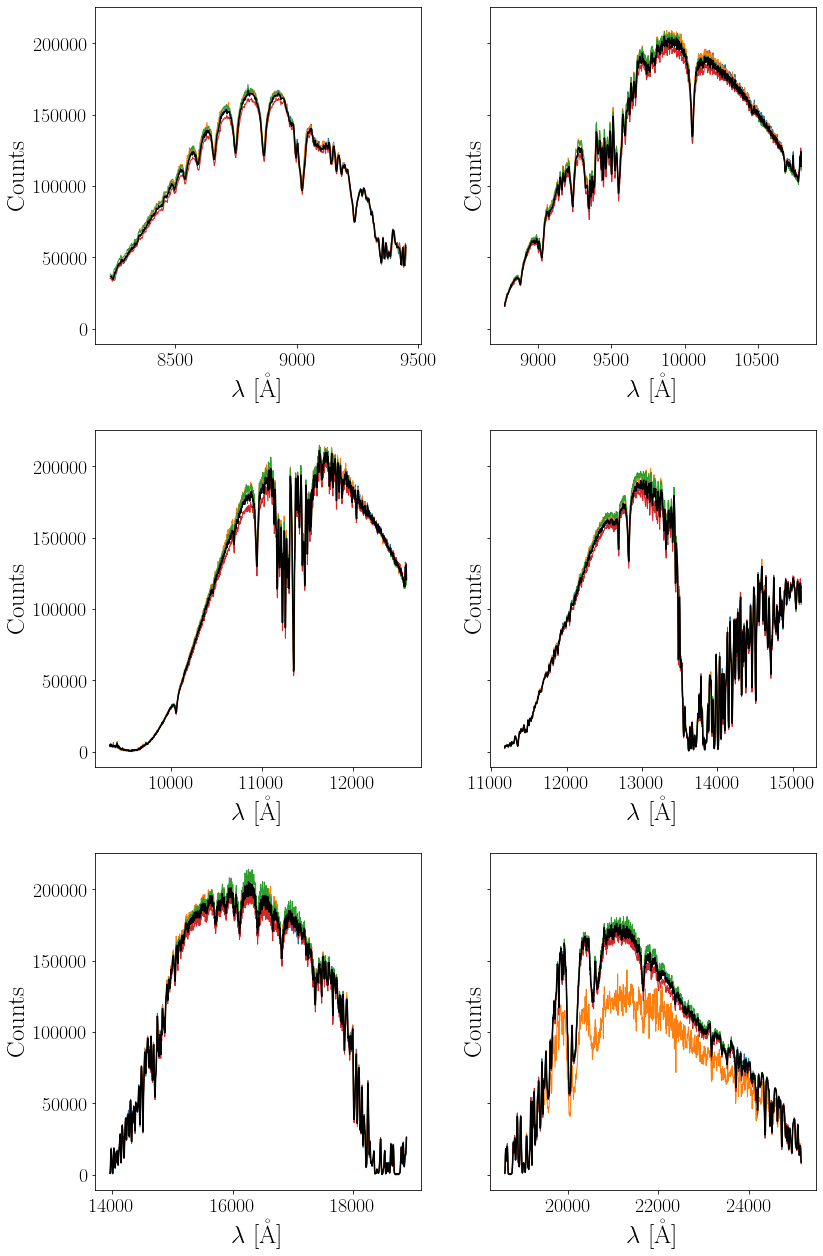

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18), sharey=True)
ax = ax.flatten()
for k in np.arange(6) + 1:
    Wav = None
    Counts = None
    Mask = None
    for m, l in enumerate(ls_cal):
        f = fits.open(Sci_folder + l)
        specdata = f[k].data
        mask = specdata['OPT_MASK']
        wav = specdata['OPT_WAVE']
        counts = specdata['OPT_COUNTS']
        print(wav[mask][0:2], wav[mask][-3:-1])
        f.close()
        
        ###co-adding
        if m == 0:
            Wav = wav
            Counts = counts
            Mask = mask
        elif m != 1:
            Wav += wav
            Counts += counts
            Mask = [i and j for (i, j) in zip(Mask, mask)]
        #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
        ax[k-1].plot(wav[mask], counts[mask], linewidth=1)
    Wav = Wav/(len(ls_cal)-1)
    Counts = Counts/(len(ls_cal)-1)
    ax[k-1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    ax[k-1].set_ylabel(r'$\mathrm{Counts}$')
    
    with fits.open(Sci_folder + output, 'update') as fout:
        fout[k].data['OPT_MASK'] = Mask
        fout[k].data['OPT_WAVE'] = Wav
        fout[k].data['OPT_COUNTS'] = Counts
        fout.flush()
        
    with fits.open(Sci_folder + output) as fout:
        mask = fout[k].data['OPT_MASK']
        wav = fout[k].data['OPT_WAVE']
        counts = fout[k].data['OPT_COUNTS']
        ax[k-1].plot(wav[mask], counts[mask], color='k')
fig.tight_layout()
plt.show()

[18607.0960568  18613.40126926] [25135.41927603 25141.81168455]
[18606.98518528 18613.32211483] [25135.26770399 25141.69088558]
[18612.92162475 18619.14832354] [25143.28796234 25149.74240588]
[18613.0212693  18619.26716688] [25143.3804856  25149.83353788]


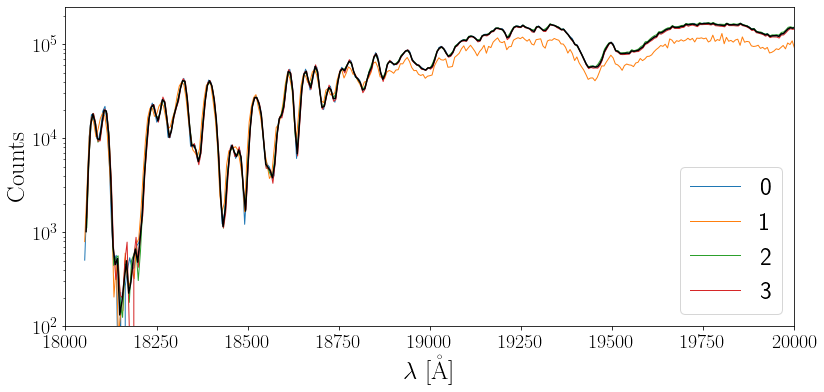

In [9]:
fig, ax = plt.subplots(figsize=(12, 6), sharey=True)
Wav = None
Counts = None
Mask = None
for m, l in enumerate(ls_cal):
    f = fits.open(Sci_folder + l)
    specdata = f[6].data
    mask = specdata['OPT_MASK']
    wav = specdata['OPT_WAVE']
    counts = specdata['OPT_COUNTS']
    print(wav[mask][0:2], wav[mask][-3:-1])
    f.close()

    ###co-adding
    if m == 0:
        Wav = wav
        Counts = counts
        Mask = mask
    else:
        Wav += wav
        Counts += counts
        Mask = [i and j for (i, j) in zip(Mask, mask)]
    #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
    ax.plot(wav[mask]/(1+0.0307), counts[mask], linewidth=1, label=m)
Wav = Wav/len(ls_cal)
Counts = Counts/len(ls_cal)
with fits.open(Sci_folder + output) as fout:
    mask = fout[6].data['OPT_MASK']
    wav = fout[6].data['OPT_WAVE']
    counts = fout[6].data['OPT_COUNTS']
    ax.plot(wav[mask]/(1+0.0307), counts[mask], color='k')
ax.set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax.set_ylabel(r'$\mathrm{Counts}$')
ax.set_yscale('log')
ax.set_xlim(18000, 20000)
ax.set_ylim(1e2, 2.5e5)
fig.tight_layout()
plt.legend()
plt.show()

## Sensitivity function

(numpy.record, [('SENS_WAVE', '>f8', (41979,)), ('SENS_COUNTS_PER_ANG', '>f8', (41979,)), ('SENS_ZEROPOINT', '>f8', (41979,)), ('SENS_ZEROPOINT_GPM', 'i1', (41979,)), ('SENS_ZEROPOINT_FIT', '>f8', (41979,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41979,)), ('SENS_COEFF', '>f8', (7,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])
(numpy.record, [('SENS_WAVE', '>f8', (41949,)), ('SENS_COUNTS_PER_ANG', '>f8', (41949,)), ('SENS_ZEROPOINT', '>f8', (41949,)), ('SENS_ZEROPOINT_GPM', 'i1', (41949,)), ('SENS_ZEROPOINT_FIT', '>f8', (41949,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41949,)), ('SENS_COEFF', '>f8', (7,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])
(numpy.record, [('SENS_WAVE', '>f8', (41949,)), ('SENS_COUNTS_PER_ANG', '>f8', (41949,)), ('SENS_ZEROPOINT', '>f8', (41949,)), ('SENS_ZEROPOINT_GPM', 'i1', (41949,)), ('SENS_ZEROPOINT_FIT', '>f8', (41949,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41949,)), ('

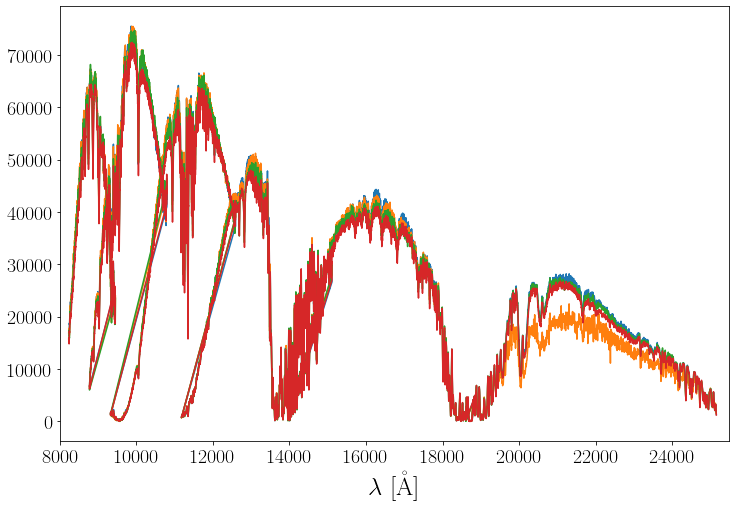

In [10]:
Flux_folder = 'gemini_gnirs_pypeit/Fluxing/'
Wav = []
S = []
plt.figure(figsize=(12, 8))
for i in np.arange(41, 45):
    f = fits.open(Flux_folder + 'sens_HIP95793_{}.fits'.format(i))
    #print(f.info())
    sens = f[2].data
    print(sens.dtype)
    wav = np.array(sens['SENS_WAVE'])
    s = sens['SENS_COUNTS_PER_ANG']
    S.append(s)
    plt.plot(wav[wav!=0], s[wav!=0])
    Wav.append(sens['SENS_WAVE'])
    plt.xlim(8000, 25500)
    plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    #plt.show()
    f.close()
#Wav = np.mean(Wav, axis=0)
#S = np.mean(S, axis=1)
#Wav.shape

## Calibrated spectrum for each exposure

Standard star: HIP95793
- Spectral type: $A_0$
- $M_V=5.783$

spec1d_N20200609S0011-SN2020jgb_GNIRS_20200609T104906.269.fits
OBJ0643-DET01-ORDER0008
OBJ0643-DET01-ORDER0007
OBJ0643-DET01-ORDER0006
OBJ0643-DET01-ORDER0005


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0643-DET01-ORDER0004
OBJ0643-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


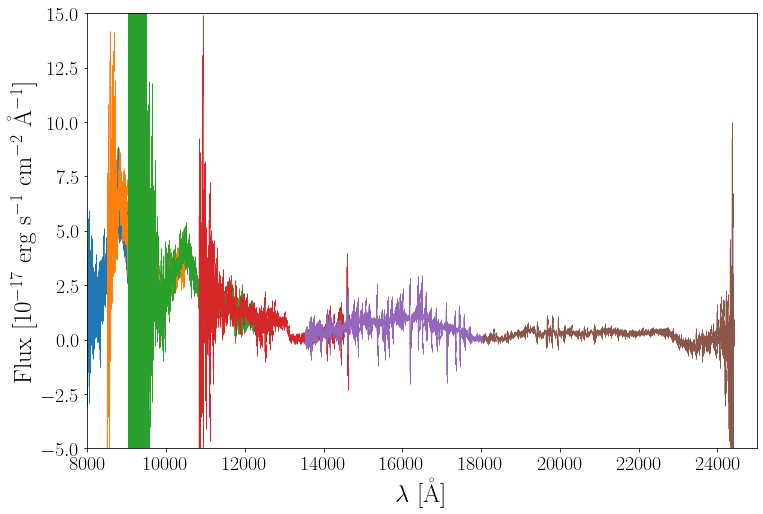

spec1d_N20200609S0012-SN2020jgb_GNIRS_20200609T105430.352.fits
OBJ0197-DET01-ORDER0008
OBJ0197-DET01-ORDER0007
OBJ0197-DET01-ORDER0006


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0197-DET01-ORDER0005
OBJ0197-DET01-ORDER0004
OBJ0197-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


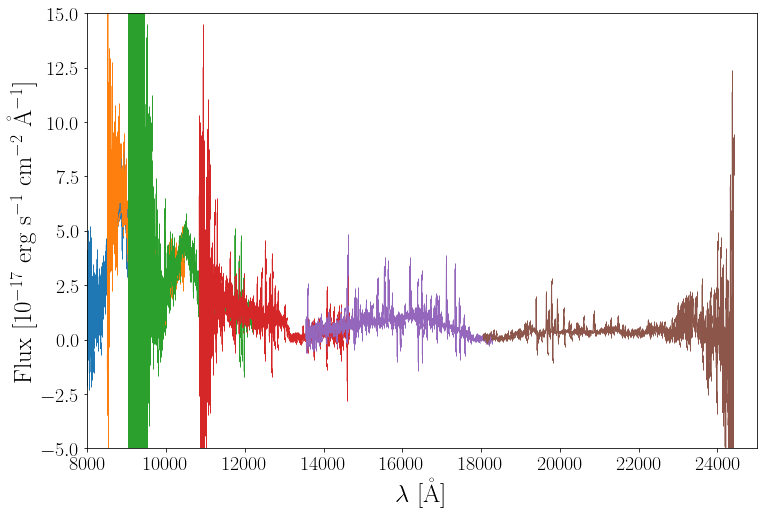

spec1d_N20200609S0013-SN2020jgb_GNIRS_20200609T105951.402.fits
OBJ0195-DET01-ORDER0008
OBJ0195-DET01-ORDER0007
OBJ0195-DET01-ORDER0006
OBJ0195-DET01-ORDER0005
OBJ0195-DET01-ORDER0004
OBJ0195-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

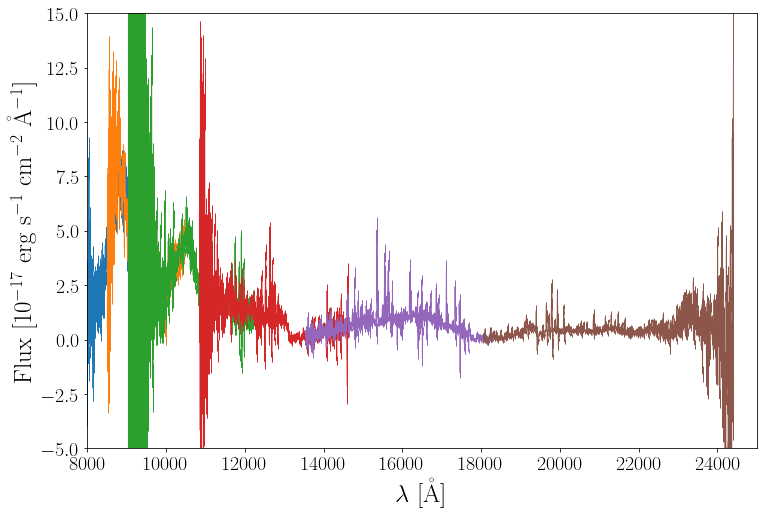

spec1d_N20200609S0014-SN2020jgb_GNIRS_20200609T110515.435.fits
OBJ0637-DET01-ORDER0008
OBJ0637-DET01-ORDER0007
OBJ0637-DET01-ORDER0006
OBJ0637-DET01-ORDER0005
OBJ0637-DET01-ORDER0004
OBJ0637-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

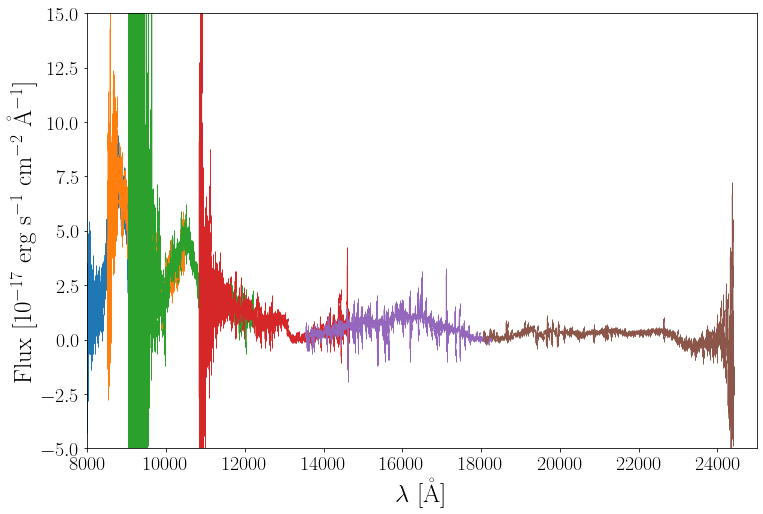

spec1d_N20200609S0015-SN2020jgb_GNIRS_20200609T111036.452.fits
OBJ0633-DET01-ORDER0008
OBJ0633-DET01-ORDER0007
OBJ0633-DET01-ORDER0006
OBJ0633-DET01-ORDER0005
OBJ0633-DET01-ORDER0004
OBJ0633-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

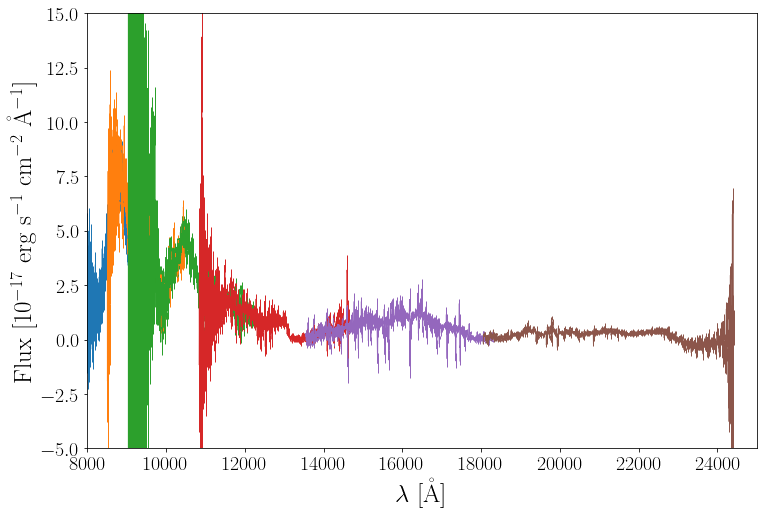

spec1d_N20200609S0016-SN2020jgb_GNIRS_20200609T111600.402.fits
OBJ0186-DET01-ORDER0008
OBJ0186-DET01-ORDER0007


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


OBJ0186-DET01-ORDER0006
OBJ0186-DET01-ORDER0005
OBJ0186-DET01-ORDER0004
OBJ0186-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5


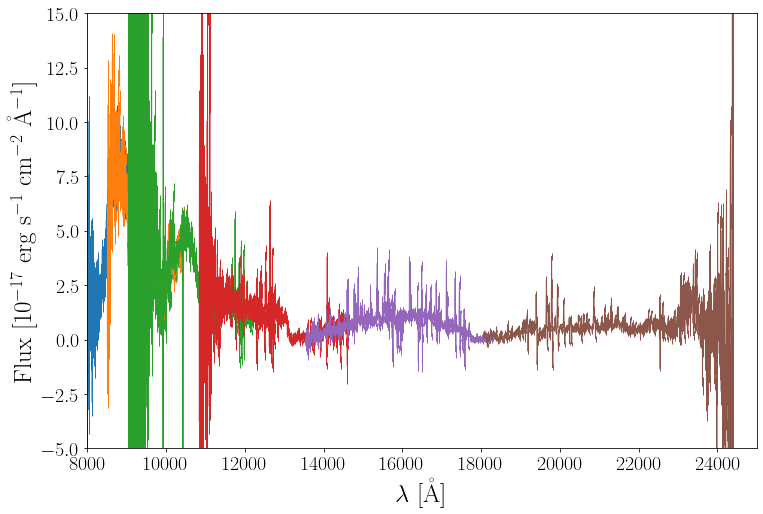

spec1d_N20200609S0017-SN2020jgb_GNIRS_20200609T112121.352.fits
OBJ0184-DET01-ORDER0008
OBJ0184-DET01-ORDER0007
OBJ0184-DET01-ORDER0006
OBJ0184-DET01-ORDER0005
OBJ0184-DET01-ORDER0004
OBJ0184-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

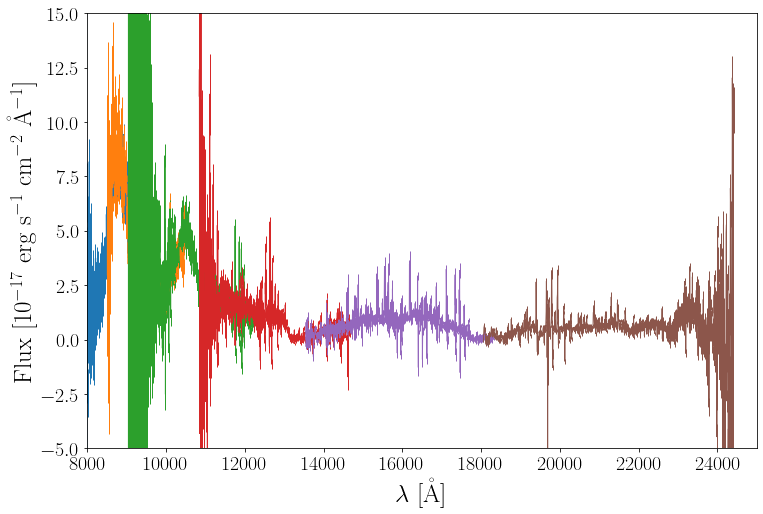

spec1d_N20200609S0018-SN2020jgb_GNIRS_20200609T112645.702.fits
OBJ0625-DET01-ORDER0008
OBJ0625-DET01-ORDER0007
OBJ0625-DET01-ORDER0006
OBJ0625-DET01-ORDER0005
OBJ0625-DET01-ORDER0004
OBJ0625-DET01-ORDER0003


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in power
  unc = specdata['OPT_FLAM_IVAR']**-.5
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/2340933080.py:16: RuntimeWarning: divide by zero encountered in p

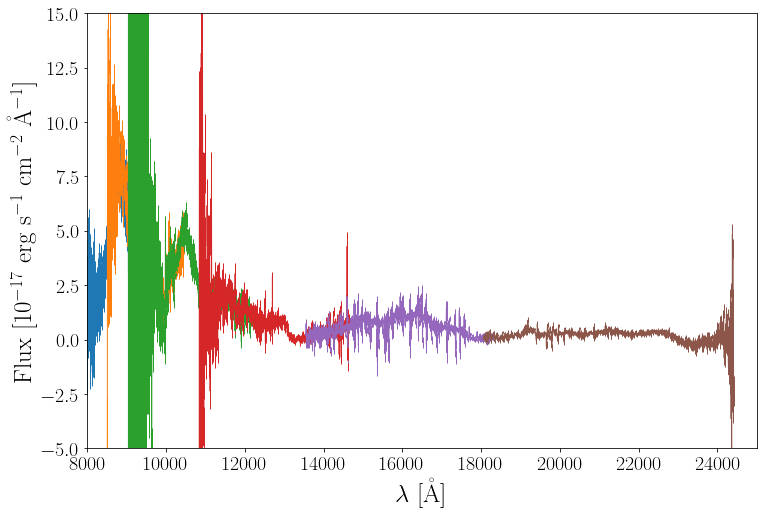

In [28]:
ls.sort()
for m, l in enumerate(ls):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(6) + 1:
        f = fits.open(Sci_folder + l)
        if len(f) > 8:
            specdata = f[k + 6].data
            print(f[k + 6].header['NAME'])
        else:
            specdata = f[k].data
            print(f[k].header['NAME'])
        wav = specdata['OPT_WAVE']
        #print(specdata)
        flux = specdata['OPT_FLAM']
        unc = specdata['OPT_FLAM_IVAR']**-.5
        f.close()
        plt.errorbar(wav[wav > 8200] / (1 + 0.0307),
                     flux[wav > 8200],
                     yerr=unc[wav > 8200],
                     linewidth=1)
        plt.xlim(8000, 25000)
        plt.ylim(-5, 15)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

## Coadding

4169
3596
3592


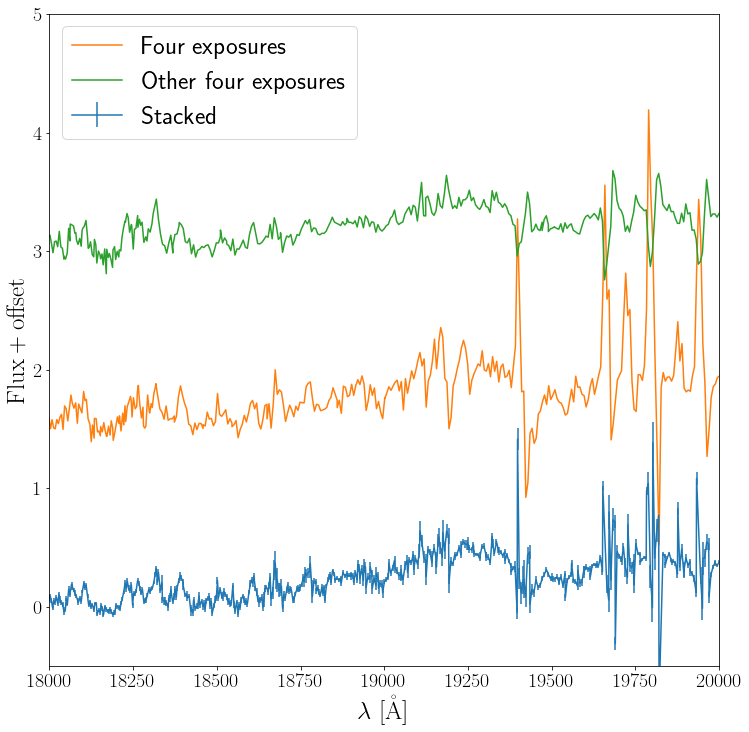

In [25]:
Coadd_folder = 'gemini_gnirs_pypeit/Coadding/'
f = fits.open(Coadd_folder + 'SN2020jgb_coadd_0.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 12))
wav = specdata['wave']/(1+0.0307)
print(len(wav))
flux = specdata['flux']
unc = specdata['ivar']**-.5
plt.errorbar(wav, flux, yerr=unc, label='Stacked')

f = fits.open(Coadd_folder + 'SN2020jgb_coadd_1.fits')
specdata = f[1].data
f.close()
wav = specdata['wave']/(1+0.0307)
print(len(wav))
flux = specdata['flux']
plt.plot(wav, flux+1.5, label='Four exposures')

f = fits.open(Coadd_folder + 'SN2020jgb_coadd_2.fits')
specdata = f[1].data
f.close()
wav = specdata['wave']/(1+0.0307)
print(len(wav))
flux = specdata['flux']
plt.plot(wav, flux+3, label='Other four exposures')
plt.xlim(18000, 20000)
plt.ylim(-0.5, 5)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
'''plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)'''
plt.ylabel(
    r'$\mathrm{Flux}+\mathrm{offset}$'
)
plt.legend()
f.close()

## Telluric correction

In [13]:
def data_binning(x, y, bins=5):
    N = len(x) // bins
    X, Y = [], []
    for i in range(N):
        X = np.append(X, x[bins*i:bins*(i+1)].mean())
        Y = np.append(Y, y[bins*i:bins*(i+1)].mean())
    return (X, Y)

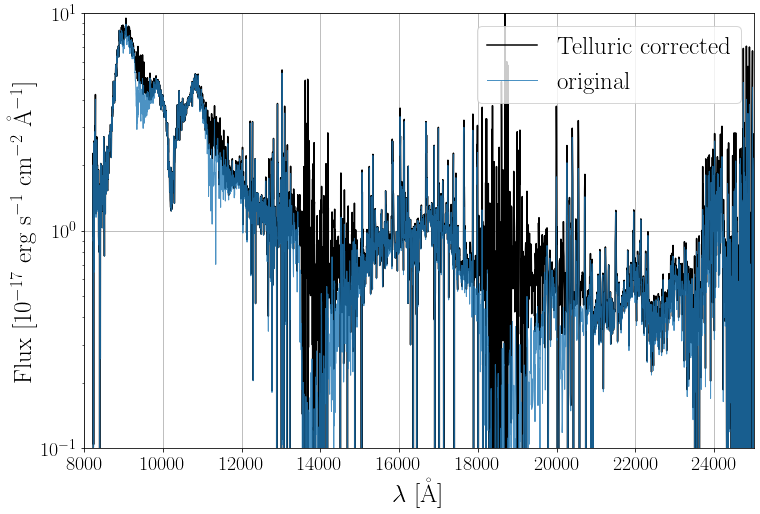

In [14]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']

plt.plot(wav,
         flux,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.plot(model[0]['WAVE'],
         flux * model[0]['TELLURIC'],
         linewidth=1,
         alpha=0.8,
         label=r'$\mathrm{original}$')
plt.xlim(8000, 25000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
plt.yscale('log')
plt.ylim(1e-1, 1e1)
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

In [21]:
def lambda_rf(lambda0, vel):
    c = 2.99792458e5
    lambda_rf = lambda0 * ((1 + vel / c) / (1 - vel / c))**.5
    return lambda_rf

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/1461045882.py:11: RuntimeWarning: divide by zero encountered in log10
  ax.plot(wav / (1 + 0.0307), np.log10(flux)-4)
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/1461045882.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.plot(wav / (1 + 0.0307), np.log10(flux*tell)-4)
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/1461045882.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(wav / (1 + 0.0307), np.log10(tell), linewidth=1, color='k')


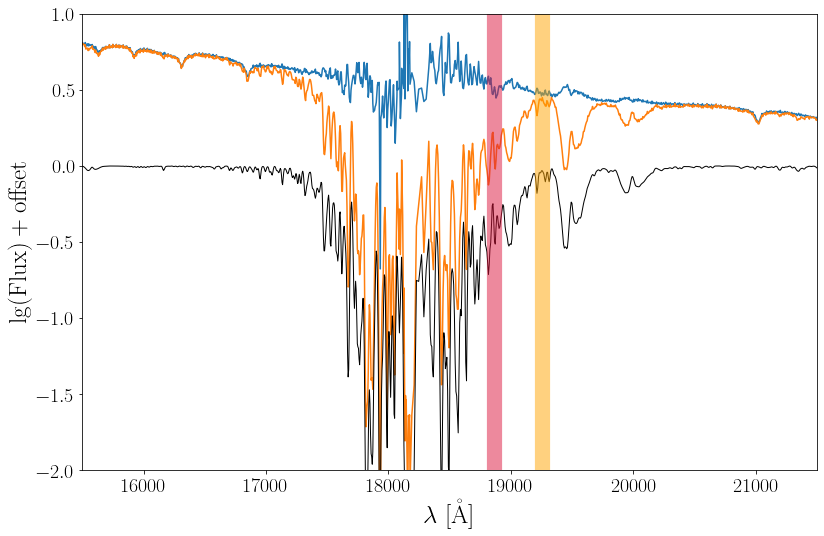

<Figure size 864x576 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(12, 8), sharex=True)

Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'HIP95793_coadd_tellcorr.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
tell = specdata['telluric']
ax.plot(wav / (1 + 0.0307), np.log10(flux)-4)
ax.plot(wav / (1 + 0.0307), np.log10(flux*tell)-4)
ax.plot(wav / (1 + 0.0307), np.log10(tell), linewidth=1, color='k')
ax.set_xlim(15500, 21500)
ax.set_ylim(-2, 1)
ax.set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax.set_ylabel(
    r'$\lg(\mathrm{Flux})+\mathrm{offset}$'
)
ax.axvline(lambda_rf(20581, -26115), color='crimson', linewidth=8*(2.0581/1.0830), alpha=0.5)
ax.axvline(lambda_rf(20581, -20000), color='orange', linewidth=8*(2.0581/1.0830), alpha=0.5)
fig.tight_layout()

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_46092/289028755.py:18: RuntimeWarning: divide by zero encountered in power
  np.array([wav, flux, model['ivar']**-.5]).transpose())


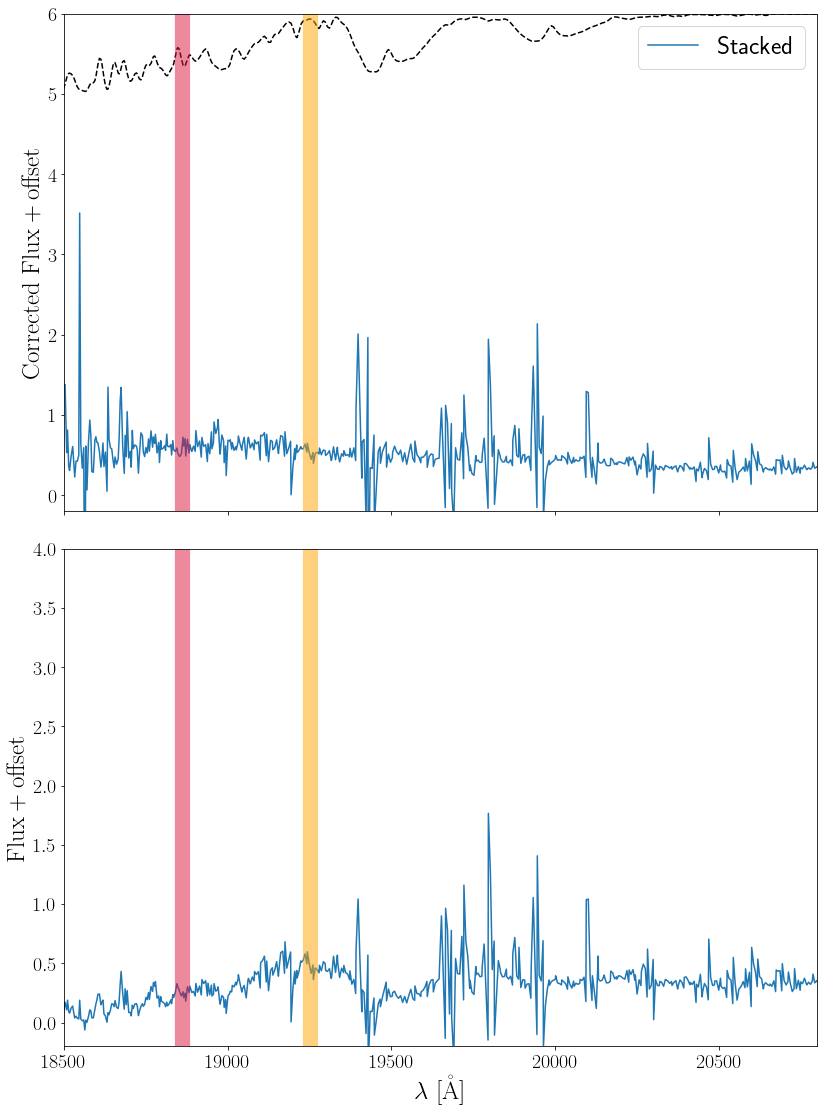

<Figure size 864x576 with 0 Axes>

In [24]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
fig, ax = plt.subplots(2, 1, figsize=(12, 16), sharex=True)
labels = ['Stacked', 'Four', 'Other four']
colors = ['crimson', 'orange', 'darkgreen']
for i in range(1):
    fmodel = fits.open(Tell_folder +
                       'SN2020jgb_coadd_{}_cp_tellcorr.fits'.format(i))
    model = fmodel[1].data
    fmodel.close()
    plt.figure(figsize=(12, 8))
    tell = model['telluric']
    wav = model['wave']
    flux = model['flux']
    ax[0].plot(wav / (1 + 0.0307), tell + 5, '--k')
    ax[0].plot(wav / (1 + 0.0307), flux + 1.5 * i, label=labels[i])
    ax[1].plot(wav / (1 + 0.0307), flux * tell + 1.5 * i)
    np.savetxt('../ZTF20aayhacx_20200609_GNIRS_v{}.ascii'.format(i),
           np.array([wav, flux, model['ivar']**-.5]).transpose())
ax[1].set_xlim(18500, 20800)
ax[0].set_ylim(-.2, 6)
ax[1].set_ylim(-.2, 4)
ax[1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax[0].set_ylabel(r'$\mathrm{Corrected\ Flux}+\mathrm{offset}$')
ax[1].set_ylabel(r'$\mathrm{Flux}+\mathrm{offset}$')
ax[0].legend()
ax[0].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[0].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


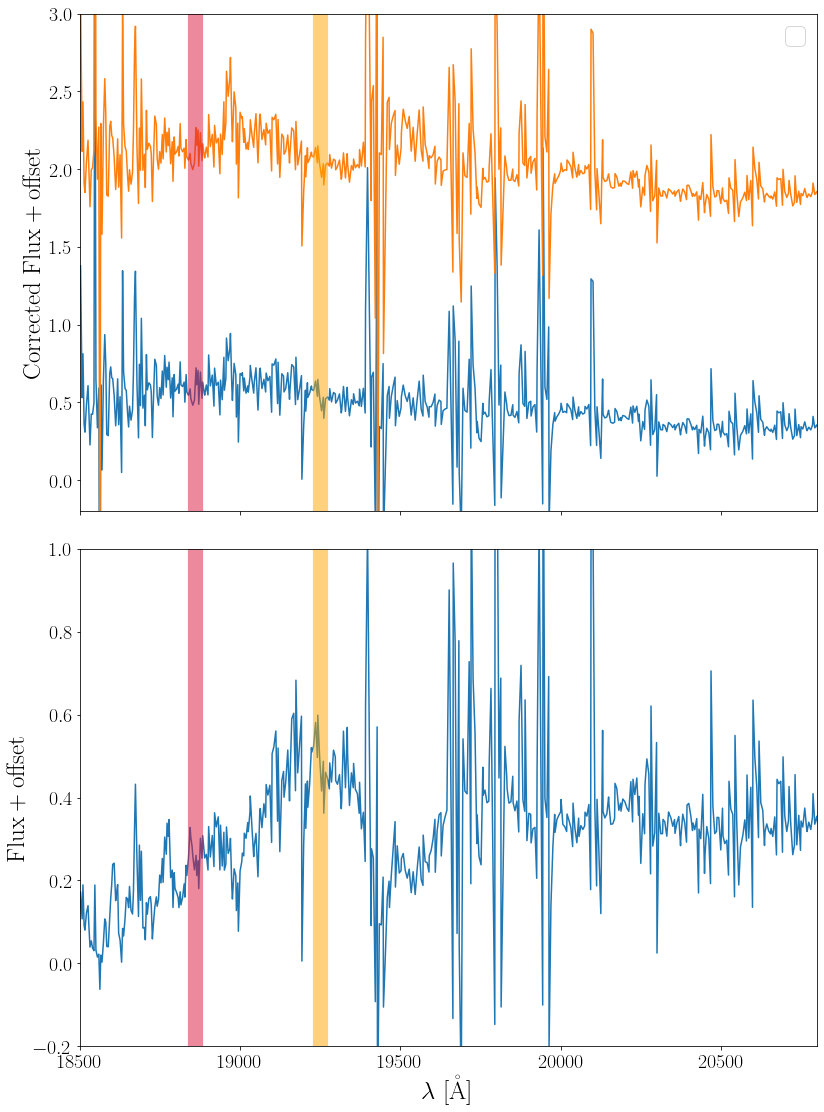

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [10]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
fig, ax = plt.subplots(2, 1, figsize=(12, 16), sharex=True)
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_0_tellcorr.fits')
model = fmodel[1].data
fmodel.close()
plt.figure(figsize=(12, 8))
tell = model['telluric']
wav = model['wave']
flux = model['flux']
ax[0].plot(wav / (1 + 0.0307), tell + 5, '--k')
ax[0].plot(wav / (1 + 0.0307), flux)
ax[1].plot(wav / (1 + 0.0307), flux * tell)
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_0_cp_tellcorr.fits')
model = fmodel[1].data
fmodel.close()
plt.figure(figsize=(12, 8))
tell = model['telluric']
wav = model['wave']
flux = model['flux']
ax[0].plot(wav / (1 + 0.0307), tell + 5, '--k')
ax[0].plot(wav / (1 + 0.0307), flux + 1.5)
ax[1].plot(wav / (1 + 0.0307), flux * tell + 1.5)
ax[1].set_xlim(18500, 20800)
ax[0].set_ylim(-.2, 3)
ax[1].set_ylim(-.2, 1)
ax[1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
ax[0].set_ylabel(r'$\mathrm{Corrected\ Flux}+\mathrm{offset}$')
ax[1].set_ylabel(r'$\mathrm{Flux}+\mathrm{offset}$')
ax[0].legend()
ax[0].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[0].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -26115),
              color='crimson',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
ax[1].axvline(lambda_rf(20581, -20000),
              color='orange',
              linewidth=8 * (2.0581 / 1.0830),
              alpha=0.5)
fig.tight_layout()
plt.show()